[Link to GitHub Repo](http://localhost:8888/notebooks/Desktop/iris_for_hyperparameter_tuning-master/iris_data_optimal_model.ipynb)
### Hyperparameter Tuning
**Introduction to the project**<br>
The process of choosing optimal parameter is called *Hyperparameter Tuning*. Here in this project, I have tried to show the following for a simple and popular iris flower data directly imported from `sklearn` library.

I have divided the project mainly into following four areas. 
- Explanatory Data Analysis
- Preprocessing of the data
- Hyperparameter Tuning
- Selection of the best model

I have tried to find out a model from different models that would get the optimal prediction.
Following are the models that are being used here for fine-tuning.
- Random Forest
- Decision Tree
- Logistic Regression
- SVM

#### Explanatory Data Analysis

In [1]:
# Load data from the source library
from sklearn.datasets import load_iris
iris = load_iris()
print(dir(iris))

['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'frame', 'target', 'target_names']


In [2]:
# You can uncomment the following code to read about the dataset.
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [3]:
# know the classes of iris in the data, (or target)
f'target_names: {iris.target_names}'

"target_names: ['setosa' 'versicolor' 'virginica']"

In [4]:
f'feature_names: {iris.feature_names}'

"feature_names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']"

In [5]:
f'filename: {iris.filename}'

'filename: iris.csv'

In [6]:
f'data: {iris.data[:5]}'

'data: [[5.1 3.5 1.4 0.2]\n [4.9 3.  1.4 0.2]\n [4.7 3.2 1.3 0.2]\n [4.6 3.1 1.5 0.2]\n [5.  3.6 1.4 0.2]]'

In [7]:
# form the dataframe by using pandas library
import pandas as pd
import numpy as np

df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [52]:
# append a column 'target'
df['target'] = iris.target
df.sample(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),iris class,target
10,5.4,3.7,1.5,0.2,setosa,0
15,5.7,4.4,1.5,0.4,setosa,0
46,5.1,3.8,1.6,0.2,setosa,0
126,6.2,2.8,4.8,1.8,virginica,2
95,5.7,3.0,4.2,1.2,versicolor,1


Below listed are the attribute information for the dataset.
- `sepal length (cm)`
- `sepal width (cm)`
- `petal length (cm)`
- `petal width (cm)`

Let's now convert the `target` column into iris_class by their respective classified names. Python lambda function has been used for the purpose.

In [53]:
# append one more column 'iris class'
df['iris class'] = iris.target
df['iris class'] = df['iris class'].apply(lambda x: iris.target_names[x])
df.sample(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),iris class,target
13,4.3,3.0,1.1,0.1,setosa,0
122,7.7,2.8,6.7,2.0,virginica,2
70,5.9,3.2,4.8,1.8,versicolor,1
44,5.1,3.8,1.9,0.4,setosa,0
145,6.7,3.0,5.2,2.3,virginica,2


In [9]:
# Basic statistics
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [10]:
# Info on data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   iris class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


Numerical features: sepal length (cm), sepal width (cm), petal length (cm), petal width (cm)<br>
Categorical feature: iris class 

In [54]:
# value counts for each label
df['iris class'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: iris class, dtype: int64

**Preprocessing the dataset**

The dataset has 150 samples in total with three different categories, 50 instances each. We now check the null values, if any.

In [55]:
# check null values
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
iris class           0
target               0
dtype: int64

In [56]:
# drop all missing values, if present
df = df.dropna()

The above method drops the samples that contains a null value. By default, it drops rows having any null value. It can be made to drop columns too. Similarly, we can consider a row or column to drop if all vlaues are null. By default, it's `any`.

**Data visualization**

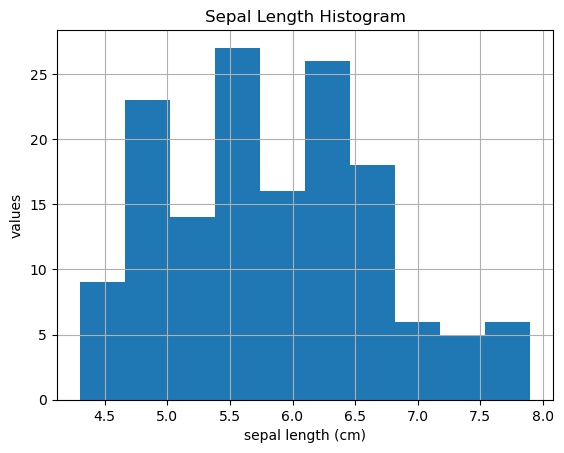

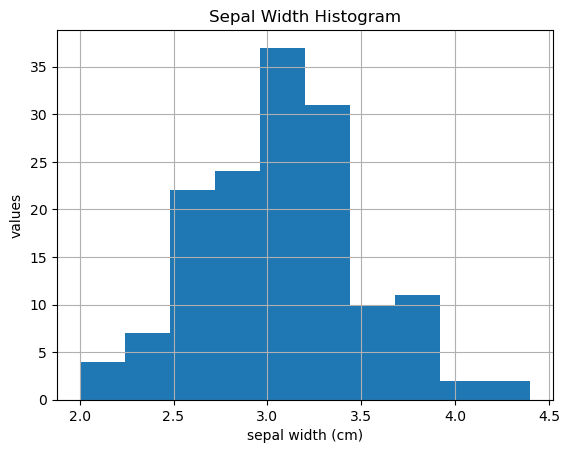

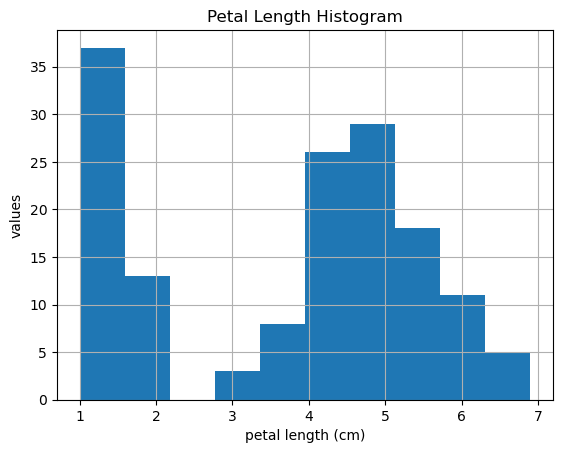

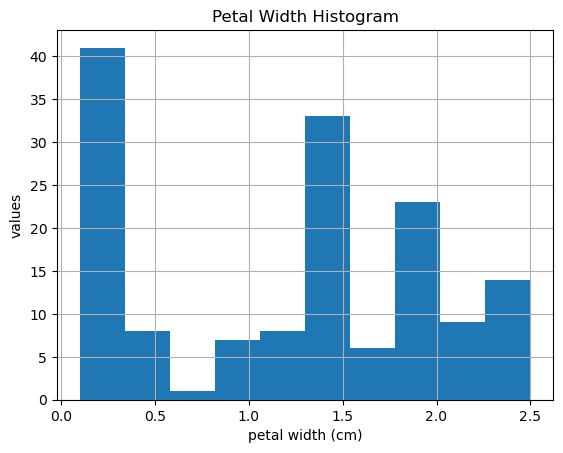

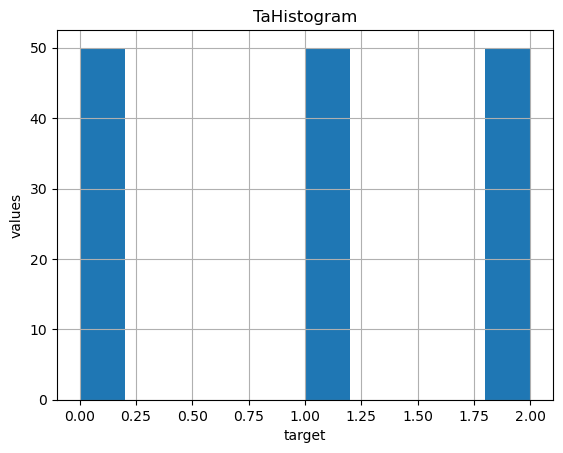

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns
# visualization as histogram for each dimension of dataset
# label column dropped
for col in df.columns.drop('iris class'):
    plt.title(col[:-4].title()+'Histogram')
    plt.xlabel(col)
    plt.ylabel('values')
    df[col].hist()
    plt.show()

**Scatterplot**<br>
Python technique for plotting `pyplot` has been used for visualization of different dimensions.

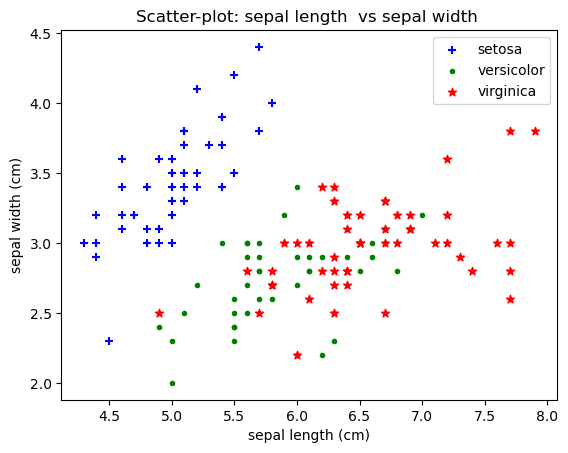

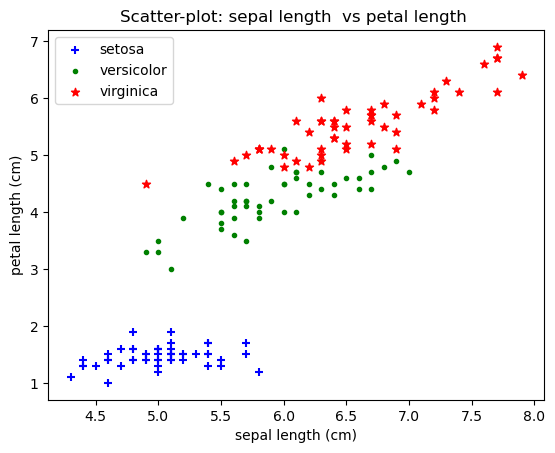

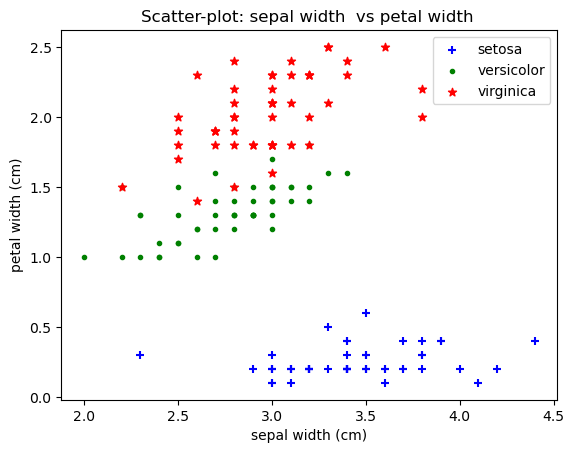

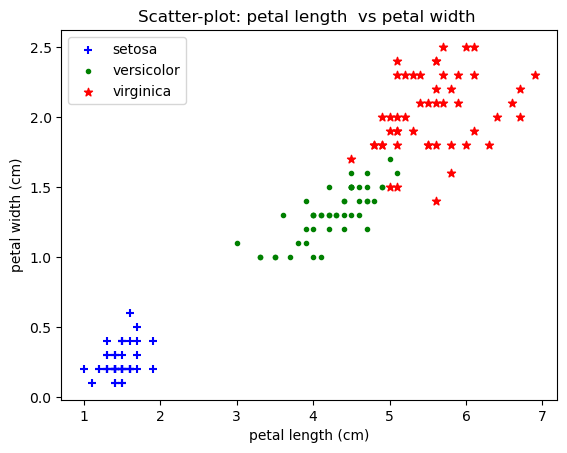

In [58]:
cls = dict(b=['setosa', '+'], g=['versicolor', '.'], r=['virginica', '*']) 

#assuming (b,g,r) as (blue,green,red)
# dictionary, each key with pair of axes as value 

dims = dict(
    one = ['sepal length (cm)', 'sepal width (cm)'],
    two = ['sepal length (cm)', 'petal length (cm)'],
    three = ['sepal width (cm)', 'petal width (cm)'],
    four = ['petal length (cm)', 'petal width (cm)']
)
# iterations to plot for each pair
for k in dims:
    for cl in cls:
        x = df[df['iris class']==cls[cl][0]]
        plt.scatter(x[dims[k][0]], x[dims[k][1]], c=cl, label=cls[cl][0], marker=cls[cl][1])
    plt.xlabel(dims[k][0])
    plt.ylabel(dims[k][1])
    plt.title(f'Scatter-plot: {dims[k][0][:-4]} vs {dims[k][1][:-4]}')
    plt.legend()
    plt.show()

**Correlation matrics**

A correlation matrix is a table showing correlation coefficients between two variables. Each cell in the table shows the correlation between two variables. The value is in between -1 and 1. If two variables have high correlation, we can neglect one variable from those two.

In [59]:
# correlation table
df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
target,0.782561,-0.426658,0.949035,0.956547,1.000000


<AxesSubplot:>

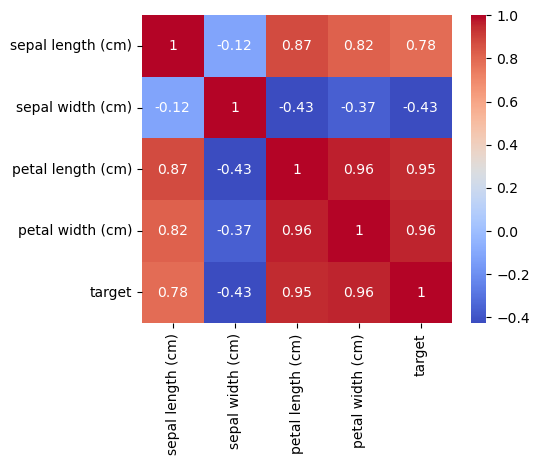

In [60]:
# store the corr-matrix
corr = df.corr()
# representation or correlation table as heatmap
# coefficients ranging from low to high, represented by color depth.
# use of seaborn library
fig, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(corr, annot=True, ax=ax, cmap='coolwarm')

**Data split**<br>
For all our computational work, we are going to adapt the data available in the dataset `iris` instead of `df` because it does not contain any unwanted feature.

Now, let's split the dataset by using `train_test_split` method from `sklearn.model_selection` with test to train ratio 3:7.

In [61]:
from sklearn.model_selection import train_test_split
train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(iris.data, iris.target, test_size=0.3)

Now, let's use the `svm` model to train the model and calculate score. I will randomly initialize the parameters because it's not known which parameters yield the best result.

In [62]:
from sklearn import svm
svm_model = svm.SVC(kernel='rbf', C=3, gamma='auto') 
svm_model.fit(X_train, y_train)
svm_model.score(X_valid, y_valid)

0.9333333333333333

Above model yields different scores each time based upon samples. For the same reason, we use K-fold cross validation. In K-fold cross validation, we assign `n` number of folds in the dataset and it takes `n` iterations. Out of `n` folds, `1/n` portion is test set and `(n-1)/n` is `train set`. `Train and test sets` will get shifting in each iteration so that either set does repeat. In other words, each iteration will operate on a new dataset to get scores individually and derive an average.

For different values of `kernel`, we can run a `python loop`. For each value of `kernel`, we can assign one or a number of values for the folds to be used in cross validating so that we can obtain a score which is more realistic and accurate.

In [63]:
# hyper parameter tuning
import numpy as np
from sklearn.model_selection import cross_val_score

kernels = ['rbf', 'linear']
C = [1, 10, 20]
avg_scores = {}
for kval in kernels:
    for cval in C:
        cv_scores = cross_val_score(svm.SVC(kernel=kval, C=cval, 
                                    gamma='auto'), iris.data, iris.target, cv=5)
        avg_scores[kval+'_'+str(cval)]=np.average(cv_scores)
avg_scores

{'rbf_1': 0.9800000000000001,
 'rbf_10': 0.9800000000000001,
 'rbf_20': 0.9666666666666668,
 'linear_1': 0.9800000000000001,
 'linear_10': 0.9733333333333334,
 'linear_20': 0.9666666666666666}

Thus, we can see that diff sets of parameters yield different scores in each iteration. However, this method is not a practical approach and not convenient. It's very costly for a data scientist and processing will be even costlier when the size of dataset is big enough.

`Scikit-learn` has a model called `GridSearchCV` which does exactly the same thing as above but in a very convenient way.

Once the model is done, we will fit the model in the datasets.

In [64]:
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(svm.SVC(gamma='auto'), 
                   dict(C=[1, 10, 20], kernel=['rbf', 'linear']),
                   cv=5, return_train_score=False)
clf.fit(iris.data, iris.target)
clf.cv_results_

{'mean_fit_time': array([0.00122852, 0.00073266, 0.00079842, 0.00066996, 0.00072474,
        0.00063272]),
 'std_fit_time': array([3.51047095e-04, 1.08961099e-04, 7.66278055e-05, 9.44408465e-05,
        2.69821583e-05, 4.83208999e-05]),
 'mean_score_time': array([0.00063825, 0.00039392, 0.00050321, 0.00035667, 0.00043006,
        0.00034461]),
 'std_score_time': array([1.80155427e-04, 5.23751735e-05, 1.33765410e-04, 3.58836991e-05,
        3.96651137e-05, 1.50227166e-05]),
 'param_C': masked_array(data=[1, 1, 10, 10, 20, 20],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_kernel': masked_array(data=['rbf', 'linear', 'rbf', 'linear', 'rbf', 'linear'],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 1, 'kernel': 'rbf'},
  {'C': 1, 'kernel': 'linear'},
  {'C': 10, 'kernel': 'rbf'},
  {'C': 10, 'kernel': 'linear'},
  {'C': 20, 'ker

It's not all that easy to read this output. But we can read this easily by converting it into pandas dataframe. 

In [65]:
score_results = pd.DataFrame(clf.cv_results_)
score_results.head(2)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001229,0.000351,0.000638,0.000180,1,rbf,"{'C': 1, 'kernel': 'rbf'}",0.966667,1.0,0.966667,0.966667,1.0,0.98,0.01633,1
1,0.000733,0.000109,0.000394,0.000052,1,linear,"{'C': 1, 'kernel': 'linear'}",0.966667,1.0,0.966667,0.966667,1.0,0.98,0.01633,1


Let us now trim this dataframe down to have only the columns that are required.

In [66]:
score_results[['param_C', 'param_kernel', 'mean_test_score']]

,param_C,param_kernel,mean_test_score
0,1,rbf,0.980000
1,1,linear,0.980000
2,10,rbf,0.980000
3,10,linear,0.973333
4,20,rbf,0.966667
5,20,linear,0.966667


In [24]:
from sklearn.model_selection import RandomizedSearchCV
rs = RandomizedSearchCV(
    svm.SVC(gamma='auto'), 
    dict(C=[1,10,20], kernel=['rbf','linear']), 
    cv=5, 
    return_train_score=False, 
    n_iter=2
)

rs.fit(iris.data, iris.target)
pd.DataFrame(rs.cv_results_)[['param_C','param_kernel','mean_test_score']]

,param_C,param_kernel,mean_test_score
0,10,rbf,0.98
1,1,linear,0.98


In [25]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [26]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto'),
        'params': {
            'C': [1,10,20],
            'kernel': ['rbf','linear']
        }
    },
    'random_forest':{
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [1,5,10]
        }
    },
    'logistic_regression': {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    }
}

In [27]:
scores = []
for model_name, mp in model_params.items():
    clf = GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(iris.data, iris.target)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })

In [28]:
pd.DataFrame(scores, columns=['model','best_score','best_params'])

,model,best_score,best_params
0,svm,0.980000,"{'C': 1, 'kernel': 'rbf'}"
1,random_forest,0.953333,{'n_estimators': 10}
2,logistic_regression,0.966667,{'C': 5}


**Conclusion**<br>
Having all computation done, it is found that `svm` model yields the best result with optimal parameters slected.

In [29]:
%%HTML
<style type="text/css">
    table.dataframe td, table.dataframe th {
        border: .3px black solid !important;
        color: black !important;
    }
</style>